# Crypto Website API Pull Using Python

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
#https://coinmarketcap.com/api/
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ebac5a35e0114c40a8d5e9352ba12511',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12487,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995345e+07,1.995345e+07,...,58.1050,1.827896e+12,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
1,1027,Ethereum,ETH,ethereum,11201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206956e+08,1.206956e+08,...,11.7339,3.508035e+11,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
2,825,Tether USDt,USDT,tether,159745,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.845427e+11,1.869035e+11,...,6.1719,1.868423e+11,None,2025-11-25T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-25 19:34:59.808455
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.025687e+10,9.998576e+10,...,4.4580,2.211827e+11,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
4,1839,BNB,BNB,bnb,2975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377365e+08,1.377365e+08,1.377365e+08,...,3.9041,1.167679e+11,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
5,5426,Solana,SOL,solana,1053,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.592621e+08,6.147945e+08,...,2.5317,8.323778e+10,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
6,3408,USDC,USDC,usd-coin,34838,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.486585e+10,7.486585e+10,...,2.5054,7.485421e+10,None,2025-11-25T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-25 19:34:59.808455
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467765e+10,9.467765e+10,...,0.8607,2.571520e+10,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
8,74,Dogecoin,DOGE,dogecoin,1351,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.519204e+11,1.519204e+11,...,0.7523,2.248810e+10,None,2025-11-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455
9,2010,Cardano,ADA,cardano,1628,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.588974e+10,4.499466e+10,...,0.4945,1.852587e+10,None,2025-11-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 19:34:59.808455


In [5]:
def api_runner():

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ebac5a35e0114c40a8d5e9352ba12511',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp.now()
    df2.to_csv(
    'crypto_log.csv', 
    mode='a', 
    header=not os.path.exists('crypto_log.csv'),
    index=False
)

In [ ]:
import os
from time import sleep

for i in range(300):
    api_runner()
    print("API runner is successful")
    sleep(60)
exit()

In [6]:
df3 = pd.read_csv(r"C:\Users\Nizanth\crypto_log.csv")
df3

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12487,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.995345e+07,1.995345e+07,...,58.2280,1.838650e+12,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
1,1027,Ethereum,ETH,ethereum,11201,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206956e+08,1.206956e+08,...,11.7104,3.515969e+11,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
2,825,Tether USDt,USDT,tether,159730,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.845427e+11,1.869035e+11,...,6.1492,1.868543e+11,NaN,2025-11-25T12:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-25 17:51:06.005910
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.025687e+10,9.998576e+10,...,4.4288,2.206765e+11,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
4,1839,BNB,BNB,bnb,2975,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377365e+08,1.377365e+08,1.377365e+08,...,3.9079,1.174842e+11,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
5,5426,Solana,SOL,solana,1053,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.592622e+08,6.147946e+08,...,2.5409,8.397418e+10,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
6,3408,USDC,USDC,usd-coin,34826,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.486484e+10,7.486484e+10,...,2.4894,7.484090e+10,NaN,2025-11-25T12:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-25 17:51:06.005910
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.467774e+10,9.467774e+10,...,0.8579,2.579179e+10,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
8,74,Dogecoin,DOGE,dogecoin,1351,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.519195e+11,1.519195e+11,...,0.7528,2.262522e+10,NaN,2025-11-25T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
9,2010,Cardano,ADA,cardano,1628,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.588974e+10,4.499466e+10,...,0.4961,1.869950e+10,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910


In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df3

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12487,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19953446.00000,19953446.00000,False,1747019267306.78003,NaN,1,NaN,NaN,NaN,2025-11-25T12:18:00.000Z,87554.76459,68265180182.63278,1.50880,0.14900,1.79359,-4.17370,-23.01531,-19.73709,-21.28051,1747019267306.78320,58.22800,1838650056408.41992,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
1,1027,Ethereum,ETH,ethereum,11201,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120695601.13398,120695601.13398,True,351596919563.03998,NaN,2,NaN,NaN,NaN,2025-11-25T12:18:00.000Z,2913.08810,27215928269.76837,11.86750,0.66630,4.09334,-4.52552,-28.14348,-25.14648,-36.70091,351596919563.04327,11.71040,351596919563.03998,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
2,825,Tether USDt,USDT,tether,159730,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,184542705843.69025,186903504864.80670,True,186854300015.35999,NaN,3,NaN,NaN,NaN,2025-11-25T12:18:00.000Z,0.99974,110084132122.40526,8.21690,-0.01721,0.01385,0.08608,-0.03472,-0.07834,-0.02992,184494122506.18625,6.14920,186854300015.35999,NaN,2025-11-25T12:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-25 17:51:06.005910
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60256871588.00000,99985757869.00000,False,220645088527.60999,NaN,4,NaN,NaN,NaN,2025-11-25T12:18:00.000Z,2.20677,6358155669.70984,51.98030,0.11661,7.60791,1.28667,-16.75823,-18.75809,-26.37283,132972765814.81244,4.42880,220676517566.32999,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
4,1839,BNB,BNB,bnb,2975,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",137736548.23000,137736548.23000,137736548.23000,False,117484156839.70000,NaN,5,NaN,NaN,NaN,2025-11-25T12:18:00.000Z,852.96284,2237837070.23673,11.99400,-0.10860,1.59184,-6.74969,-24.87165,-8.82056,-0.67279,117484156839.70496,3.90790,117484156839.70000,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
5,5426,Solana,SOL,solana,1053,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,559262196.96037,614794578.45817,True,83974179683.75000,NaN,6,525236893.30000,71741584587.68710,NaN,2025-11-25T12:18:00.000Z,136.58900,5213361669.38067,17.47250,0.28003,5.77550,-0.60149,-31.04323,-29.21383,-33.18214,76389066955.75824,2.54090,83974179683.75000,NaN,2025-11-25T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-25 17:51:06.005910
6,3408,USDC,USDC,usd-coin,34826,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,74864840809.61673,74864840809.61673,False,74840896109.22000,NaN,7,60901219650.23000,60881741061.31660,NaN,2025-11-25T12:18:00.000Z,0.99968,14481686506.00843,21.81590,-0.03817,-0.00139,-0.01045,-0.02301,-0.00942,-0.01288,74840896109.22200,2.48940,74840896109.22000,NaN,2025-11-25T12:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-25 17:51:06.005910
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94677740492.68970,94677741657.86540,Tru

In [10]:
df4 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23089,1.89910,-4.14852,-22.90949,-19.64660,-21.23310
Ethereum,0.94193,4.37189,-4.41733,-27.90573,-24.87670,-36.51719
Tether USDt,-0.00924,0.02693,0.08644,-0.02154,-0.07302,-0.02527
XRP,0.08974,7.48508,1.20375,-16.73396,-18.76672,-26.40715
BNB,-0.06396,1.55841,-6.76680,-24.81549,-8.76364,-0.64229
Solana,0.21443,5.67773,-0.66306,-31.01832,-29.19187,-33.20585
USDC,-0.01967,-0.00089,0.00160,-0.01229,0.00451,0.00215
TRON,0.11296,-1.40778,-5.80142,-9.23144,-18.51123,-22.04121
Dogecoin,0.25760,2.80274,-4.89921,-26.21096,-33.02947,-31.94979


In [11]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h       0.23089
              quote.USD.percent_change_24h      1.89910
              quote.USD.percent_change_7d      -4.14852
              quote.USD.percent_change_30d    -22.90949
              quote.USD.percent_change_60d    -19.64660
              quote.USD.percent_change_90d    -21.23310
Ethereum      quote.USD.percent_change_1h       0.94193
              quote.USD.percent_change_24h      4.37189
              quote.USD.percent_change_7d      -4.41733
              quote.USD.percent_change_30d    -27.90573
              quote.USD.percent_change_60d    -24.87670
              quote.USD.percent_change_90d    -36.51719
Tether USDt   quote.USD.percent_change_1h      -0.00924
              quote.USD.percent_change_24h      0.02693
              quote.USD.percent_change_7d       0.08644
              quote.USD.percent_change_30d     -0.02154
              quote.USD.percent_change_60d     -0.07302
     

In [12]:
type(df5)

pandas.core.series.Series

In [13]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                                
Bitcoin      quote.USD.percent_change_1h     0.23089
             quote.USD.percent_change_24h    1.89910
             quote.USD.percent_change_7d    -4.14852
             quote.USD.percent_change_30d  -22.90949
             quote.USD.percent_change_60d  -19.64660
             quote.USD.percent_change_90d  -21.23310
Ethereum     quote.USD.percent_change_1h     0.94193
             quote.USD.percent_change_24h    4.37189
             quote.USD.percent_change_7d    -4.41733
             quote.USD.percent_change_30d  -27.90573
             quote.USD.percent_change_60d  -24.87670
             quote.USD.percent_change_90d  -36.51719
Tether USDt  quote.USD.percent_change_1h    -0.00924
             quote.USD.percent_change_24h    0.02693
             quote.USD.percent_change_7d     0.08644
             quote.USD.percent_change_30d   -0.02154
             quote.USD.percent_change_60d   -0.07302
             quote.USD.percent_change_90d   -0.02527
XRP          quote.USD.percent_change_1h     0.08974
             quote.USD.percent_change_24h    7.48508
             quote.USD.percent_change_7d     1.20375
             quote.USD.percent_change_30d  -16.73396
             quote.USD.percent_change_60d  -18.76672
             quote.USD.percent_change_90d  -26.40715
BNB          quote.USD.percent_change_1h    -0.06396
             quote.USD.percent_change_24h    1.55841
             quote.USD.percent_change_7d    -6.76680
             quote.USD.percent_change_30d  -24.81549
             quote.USD.percent_change_60d   -8.76364
             quote.USD.percent_change_90d   -0.64229
Solana       quote.USD.percent_change_1h     0.21443
             quote.USD.percent_change_24h    5.67773
             quote.USD.percent_change_7d    -0.66306
             quote.USD.percent_change_30d  -31.01832
             quote.USD.percent_change_60d  -29.19187
             quote.USD.percent_change_90d  -33.20585
USDC         quote.USD.percent_change_1h    -0.01967
             quote.USD.percent_change_24h   -0.00089
             quote.USD.percent_change_7d     0.00160
             quote.USD.percent_change_30d   -0.01229
             quote.USD.percent_change_60d    0.00451
             quote.USD.percent_change_90d    0.00215
TRON         quote.USD.percent_change_1h     0.11296
             quote.USD.percent_change_24h   -1.40778
             quote.USD.percent_change_7d    -5.80142
             quote.USD.percent_change_30d   -9.23144
             quote.USD.percent_change_60d  -18.51123
             quote.USD.percent_change_90d  -22.04121
Dogecoin     quote.USD.percent_change_1h     0.25760
             quote.USD.percent_change_24h    2.80274
             quote.USD.percent_change_7d    -4.89921
             quote.USD.percent_change_30d  -26.21096
             quote.USD.percent_change_60d  -33.02947
             quote.USD.percent_change_90d  -31.94979
Cardano      quote.USD.percent_change_1h    -0.04015
             quote.USD.percent_change_24h    2.05684
             quote.USD.percent_change_7d   -11.17427
             quote.USD.percent_change_30d  -38.57411
             quote.USD.percent_change_60d  -45.35644
             quote.USD.percent_change_90d  -51.86406
Hyperliquid  quote.USD.percent_change_1h     0.62671
             quote.USD.percent_change_24h    5.42362
             quote.USD.percent_change_7d   -20.23102
             quote.USD.percent_change_30d  -32.11926
             quote.USD.percent_change_60d  -20.20318
             quote.USD.percent_change_90d  -33.94336
Bitcoin Cash quote.USD.percent_change_1h     0.05138
             quote.USD.percent_change_24h   -4.15725
             quote.USD.percent_change_7d     7.16126
             quote.USD.percent_change_30d   -6.45957
             quote.USD.percent_change_60d   -3.68072
             quote.USD.percent_change_90d   -5.76678
Chainlink    quote.USD.percent_change_1h     0.68583
             quote.USD.percent_change_24h    3.17008
             quote

In [14]:
df6.count()

values    90
dtype: int64

In [15]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23089
1,Bitcoin,quote.USD.percent_change_24h,1.89910
2,Bitcoin,quote.USD.percent_change_7d,-4.14852
3,Bitcoin,quote.USD.percent_change_30d,-22.90949
4,Bitcoin,quote.USD.percent_change_60d,-19.64660
5,Bitcoin,quote.USD.percent_change_90d,-21.23310
6,Ethereum,quote.USD.percent_change_1h,0.94193
7,Ethereum,quote.USD.percent_change_24h,4.37189
8,Ethereum,quote.USD.percent_change_7d,-4.41733
9,Ethereum,quote.USD.percent_change_30d,-27.90573


In [16]:
df8 = df7.rename(columns = {'name' : 'Name', 'level_1' : 'Percent_change', 'values' : 'Values'})
df8

,Name,Percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,0.23089
1,Bitcoin,quote.USD.percent_change_24h,1.89910
2,Bitcoin,quote.USD.percent_change_7d,-4.14852
3,Bitcoin,quote.USD.percent_change_30d,-22.90949
4,Bitcoin,quote.USD.percent_change_60d,-19.64660
5,Bitcoin,quote.USD.percent_change_90d,-21.23310
6,Ethereum,quote.USD.percent_change_1h,0.94193
7,Ethereum,quote.USD.percent_change_24h,4.37189
8,Ethereum,quote.USD.percent_change_7d,-4.41733
9,Ethereum,quote.USD.percent_change_30d,-27.90573


In [17]:
df8['Percent_change'] = df8['Percent_change'].map({
    'quote.USD.percent_change_1h': '1 Hour',
    'quote.USD.percent_change_24h': '24 Hour',
    'quote.USD.percent_change_7d': '7 Days',
    'quote.USD.percent_change_30d': '30 Days',
    'quote.USD.percent_change_60d': '60 Days',
    'quote.USD.percent_change_90d': '90 Days'
})

df8

,Name,Percent_change,Values
0,Bitcoin,1 Hour,0.23089
1,Bitcoin,24 Hour,1.89910
2,Bitcoin,7 Days,-4.14852
3,Bitcoin,30 Days,-22.90949
4,Bitcoin,60 Days,-19.64660
5,Bitcoin,90 Days,-21.23310
6,Ethereum,1 Hour,0.94193
7,Ethereum,24 Hour,4.37189
8,Ethereum,7 Days,-4.41733
9,Ethereum,30 Days,-27.90573


In [21]:
import seaborn as sb
import matplotlib.pyplot as plt

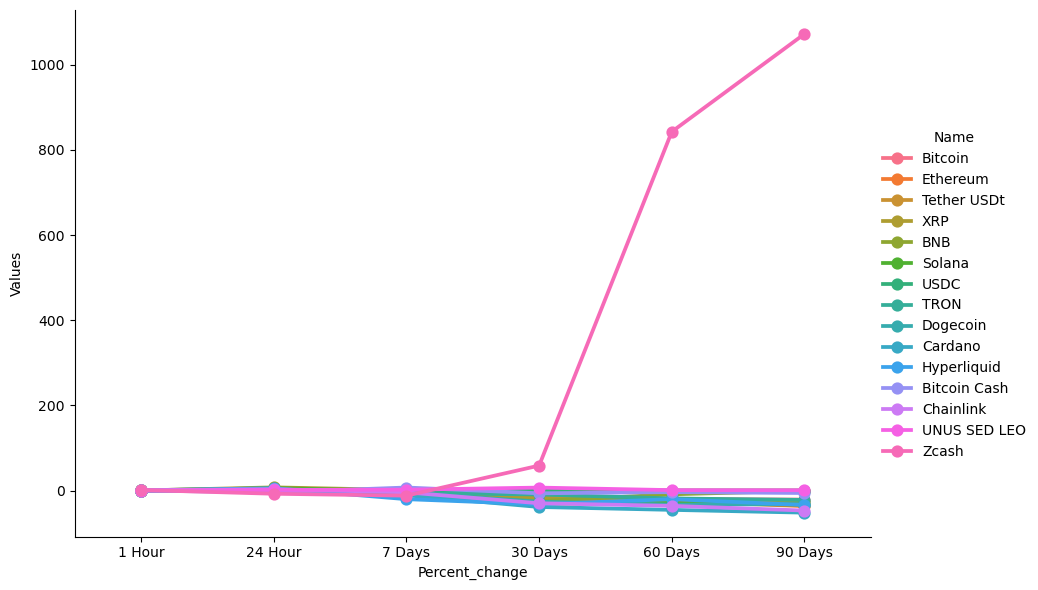

In [45]:
sb.catplot(x = 'Percent_change', 
           y = 'Values', 
           hue = 'Name', 
           data = df8, 
           kind = 'point', 
           height = 6, 
           aspect = 1.5,
           )

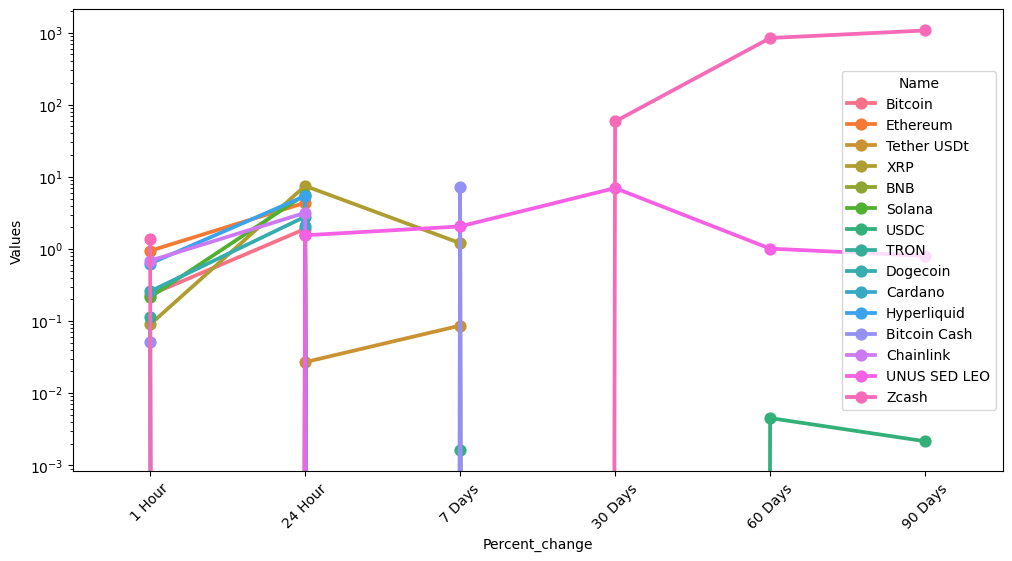

In [31]:
plt.figure(figsize=(12,6))
sb.pointplot(
    x='Percent_change',
    y='Values',
    hue='Name',
    data=df8,
    order=["1 Hour","24 Hour","7 Days","30 Days","60 Days","90 Days"]
)
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

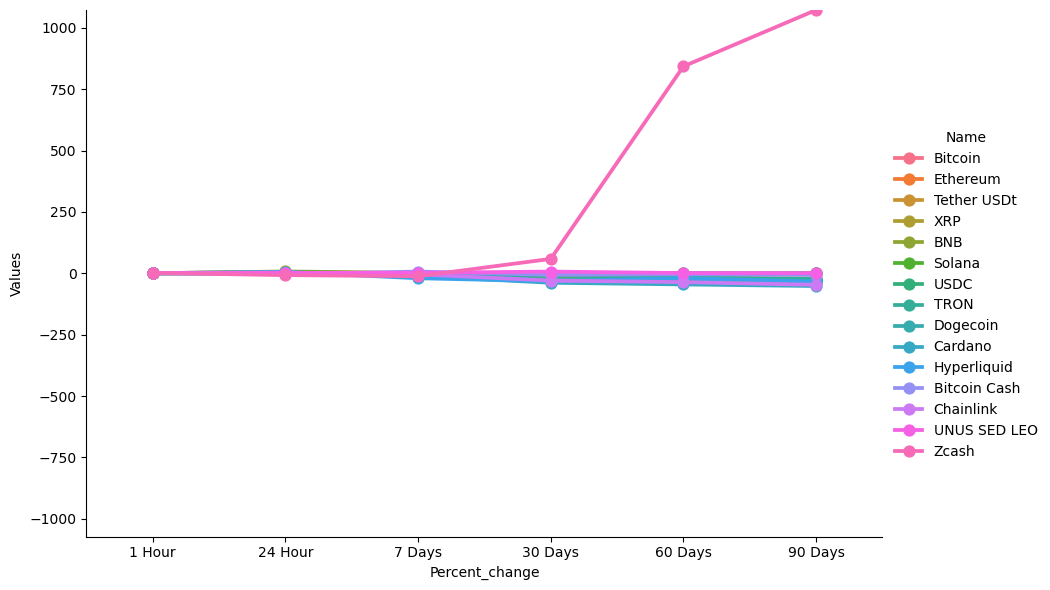

In [55]:
g = sb.catplot(
    x='Percent_change',
    y='Values',
    hue='Name',
    data=df8,
    kind='point',
    height=6,
    aspect=1.5
)

max_val = abs(df8['Values']).max()
g.set(ylim=(-max_val, max_val))

In [62]:
df9 = df3[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,87554.76459,2025-11-25 17:51:06.005910
15,Bitcoin,87589.95459,2025-11-25 17:52:06.834107
30,Bitcoin,87657.82360,2025-11-25 17:53:07.348706


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

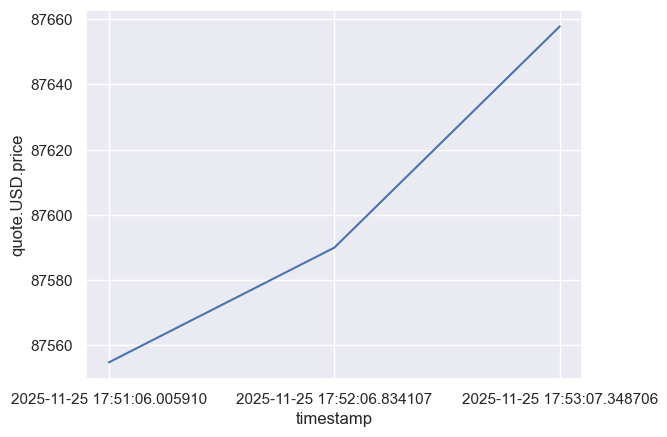

In [63]:
sb.set_theme(style = 'darkgrid')
sb.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9)